# Implement SGD for Linear Regression

Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
http://archive.ics.uci.edu/ml/datasets/Housing


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
**References**

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

In [61]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [9]:
boston = load_boston()

print(boston.data.shape)

(506, 13)


In [10]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

### Splitting the data into train and test

In [14]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


### Standardizing the data

In [15]:
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


### Manual SGD

In [16]:
class ManualSGDRegressor():
    
    def __init__(self, eta0, max_iter, batch_size = 10, eta_variation = 'invscaling', power_epoch = 0.5):
        
        '''
         eta0 = learning rate
         max_iter = epochs
         batch_size [default 10]
         eta_variation
         
            ‘constant’:
             eta = eta0
            
            ‘invscaling’: [default]
             eta = eta0 / pow(epoch, power_epoch)
        
         power_t = The exponent for inverse scaling learning rate [default 0.5].
        '''
        self.w = None
        self.b = None
        self.eta = eta0
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.eta_variation = eta_variation
        self.power_epoch = power_epoch
        self.coef_ = None
        self.intercept_ = None
        self.n = None
        self.d = None
        
    def initialize_weights(self):
        self.w = np.random.normal(0, 0.1, X.shape[1])
        self.b = np.random.normal(0, 0.1)
        
    def predict(self, x):
        return np.dot(self.coef_.reshape(1, self.d) , x.T) + self.intercept_
    
    def compute_squared_loss(self, y, y_pred):
        
        loss = y - y_pred.ravel()                
        squared_loss = loss**2
        
        return squared_loss
    
    def compute_gradient(self, x, y, y_pred, batch_size):
        
        w_grad = (-2/batch_size) * np.dot(x.T, (y - y_pred.ravel()))
        b_grad = (-2/batch_size) * (sum(y - y_pred.ravel()))
        
        return w_grad, b_grad
    
    def update_weights(self, w_grad, b_grad):
        
        self.coef_ = self.coef_ - self.eta * w_grad
        self.intercept_ = self.intercept_ - self.eta * b_grad
        
    def fit(self, x_train, y_train):
        self.initialize_weights()
        
        self.coef_ = self.w
        self.intercept_ = self.b
        
        self.n = x_train.shape[0]
        self.d = x_train.shape[1]
        
        mini_batches = [(x_train[i : i + self.batch_size, :], y_train[i : i + self.batch_size]) for i in range(0, self.n, self.batch_size)]
        
        for epoch in range(1, self.max_iter + 1):
            
            #'invscaling' is similar to that of sklearn.linear_model.SGDRegressor
            if self.eta_variation == 'invscaling' :
                self.eta = self.eta / pow(epoch, self.power_epoch)
                
            total_squared_loss = 0
            for batch in mini_batches:
                
                x_batch = batch[0]
                y_batch = batch[1]
                batch_size = x_batch.shape[0]
                
                y_batch_pred = self.predict(x_batch)
                squared_loss = self.compute_squared_loss(y_batch, y_batch_pred)
                total_squared_loss += sum(squared_loss)
                
                w_grad, b_grad = self.compute_gradient(x_batch, y_batch, y_batch_pred, batch_size)
                
                self.update_weights(w_grad, b_grad)
            
            print("epoch : " + str(epoch) + " ----> " + " loss : " + str(total_squared_loss/self.n))

In [35]:
def scatter_plot(y, y_pred):
    
    plt.scatter(y, y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

In [17]:
manualsgdregressor = ManualSGDRegressor(eta0 = 0.1, max_iter = 100)

In [18]:
manualsgdregressor.fit(X_train, Y_train)

epoch : 1 ---->  loss : 80.94823812784392
epoch : 2 ---->  loss : 24.456357605726375
epoch : 3 ---->  loss : 21.8730298837498
epoch : 4 ---->  loss : 21.051184770601978
epoch : 5 ---->  loss : 20.416176131965493
epoch : 6 ---->  loss : 19.964944368216386
epoch : 7 ---->  loss : 19.780829030894054
epoch : 8 ---->  loss : 19.713866656555354
epoch : 9 ---->  loss : 19.68998026393374
epoch : 10 ---->  loss : 19.68189005103613
epoch : 11 ---->  loss : 19.679292137992363
epoch : 12 ---->  loss : 19.678498149202422
epoch : 13 ---->  loss : 19.678266211080516
epoch : 14 ---->  loss : 19.678201207920342
epoch : 15 ---->  loss : 19.678183673126593
epoch : 16 ---->  loss : 19.678179107839703
epoch : 17 ---->  loss : 19.678177957910634
epoch : 18 ---->  loss : 19.678177677100848
epoch : 19 ---->  loss : 19.678177610498977
epoch : 20 ---->  loss : 19.67817759513162
epoch : 21 ---->  loss : 19.678177591677148
epoch : 22 ---->  loss : 19.678177590919624
epoch : 23 ---->  loss : 19.678177590757375
epo

In [40]:
manualsgd_pred = manualsgdregressor.predict(X_test)

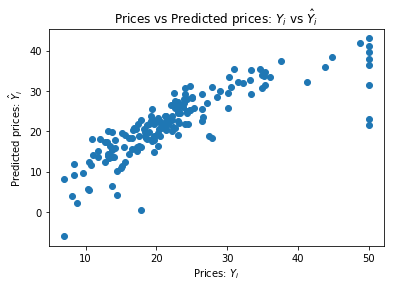

In [41]:
scatter_plot(Y_test, manualsgd_pred.ravel())

### sklearn SGDRegressor

In [78]:
sgdregressor = SGDRegressor(loss = 'squared_loss'
                            ,penalty = 'none'
                            ,fit_intercept = True
                            ,max_iter = 100
                            ,shuffle = False
                            ,learning_rate = 'invscaling'
                            ,eta0 = 0.1
                            ,power_t = 0.5
                           )

In [79]:
sgdregressor.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='none',
       power_t=0.5, random_state=None, shuffle=False, tol=None, verbose=0,
       warm_start=False)

In [80]:
sklearnsgd_pred = sgdregressor.predict(X_test)

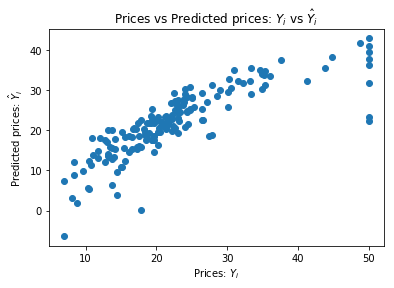

In [81]:
scatter_plot(Y_test, sklearnsgd_pred)

## Comparison between Manual SGD vs Sklearn SGD

### 1) Mean Squared error Comparison

In [82]:
x = PrettyTable()
x.field_names = ["Manual SGD MSE", "Sklearn SGD MSE"]

x.add_row([mean_squared_error(Y_test, manualsgd_pred.ravel()), mean_squared_error(Y_test, sklearnsgd_pred)])

print(x)

+--------------------+-------------------+
|   Manual SGD MSE   |  Sklearn SGD MSE  |
+--------------------+-------------------+
| 28.900630817281463 | 28.60428132974276 |
+--------------------+-------------------+


### 2) Weights Comparison

In [83]:
x = PrettyTable()

x.add_column("Manual SGD Weights (w)",manualsgdregressor.coef_)
x.add_column("Sklearn SGD Weights (w)",sgdregressor.coef_)

print(x)

+------------------------+-------------------------+
| Manual SGD Weights (w) | Sklearn SGD Weights (w) |
+------------------------+-------------------------+
|  -1.3130928529890302   |   -1.3236928589006762   |
|   0.7397876918277372   |    0.8516894023424136   |
|  -0.5336711574362717   |   -0.2560181062637622   |
|   0.2271617073349296   |   0.20422827619970232   |
|  -1.3248476340862139   |   -1.4986580762560147   |
|   2.9372819606624607   |    2.8108169017969766   |
|  -0.40257189428691204  |   -0.35049799904898754  |
|  -2.6102196596415674   |   -2.7706806210092165   |
|   2.2639513880060953   |    2.7549742457296835   |
|   -1.541033525764789   |   -2.0459568927857616   |
|  -2.1404070158363195   |    -2.13497639036739    |
|   0.9635732178879788   |    1.0364897915477285   |
|  -3.1223105849036066   |    -3.318770741957669   |
+------------------------+-------------------------+


### 3) Intercept comparison

In [84]:
x = PrettyTable()
x.field_names = ["Manual SGD intercept (b)", "Sklearn SGD intercept (b)"]

x.add_row([manualsgdregressor.intercept_, sgdregressor.intercept_[0]])

print(x)

+--------------------------+---------------------------+
| Manual SGD intercept (b) | Sklearn SGD intercept (b) |
+--------------------------+---------------------------+
|    22.643092636664242    |     22.55984186228535     |
+--------------------------+---------------------------+


# Conclusions:

<ol>
    <li>Ran Manual SGD implementation and Sklearn SGD implementation for loss = 'squared_loss', penalty = 'none', fit_intercept = True, max_iter = 100, shuffle = False, learning_rate = 'invscaling', eta0 = 0.1, power_t = 0.5.
    </li>
    <li>Observed that Manual SGD MSE is close to Sklearn SGD implementation :) 
    </li>
    <li>Observed that weights for Manual SGD and Sklearn SGD implementation are close
    </li>
    <li>Observed that intercept term for Manual SGD and Sklearn SGD implementation is very close
    </li>
</ol>